## Chapter 2: Mapping Netflix’s Global Audience

As Netflix transformed from a U.S.-centric streaming service into a global entertainment powerhouse, its subscriber base grew in both size and diversity. This chapter delves into that evolution — examining how the number of subscribers has surged over the years, which countries make up Netflix’s core markets, and how subscription types vary across its international audience. By exploring this data, we gain insights into how Netflix built a truly global footprint.

In [138]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv('../data/netflix_users.csv')
subscribers_df = pd.read_csv('../data/netflix_global_subscribers.csv')


df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [139]:

df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')
df.isna().sum()


User_ID              0
Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64

In [140]:
subscribers_df.info()
subscribers_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            14 non-null     int64  
 1   Netflix Subscribers (millions)  14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 356.0 bytes


,Year,Netflix Subscribers (millions)
0,2024,301.60
1,2023,260.28
2,2022,230.70
3,2021,219.70
4,2020,192.90


In [141]:
subscribers_df.rename(columns={'Netflix Subscribers (millions)': 'Netflix Subscribers'}, inplace=True)
# Multiply by 1,000,000 to get the actual number of subscribers
subscribers_df['Netflix Subscribers'] = subscribers_df['Netflix Subscribers'] * 1_000_000




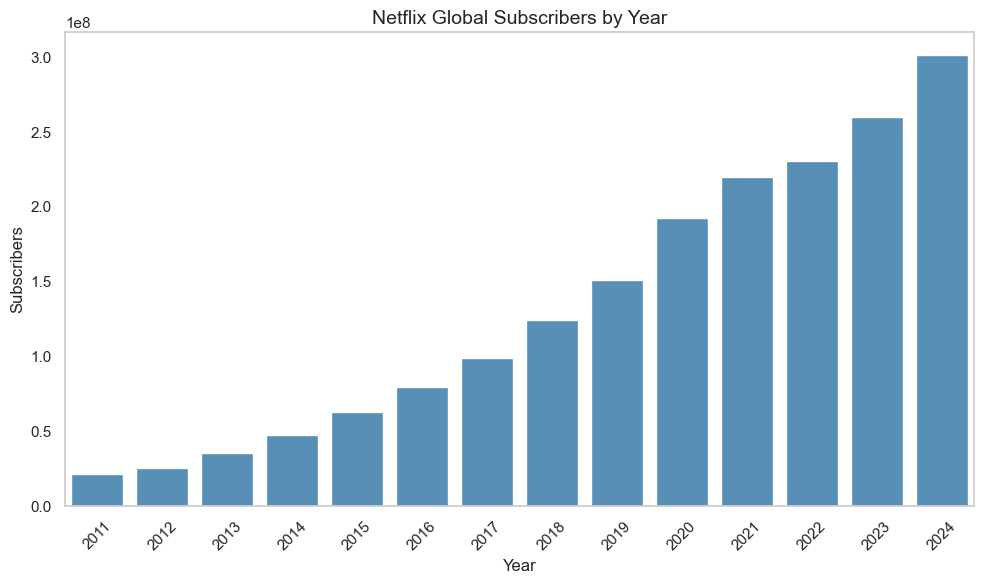

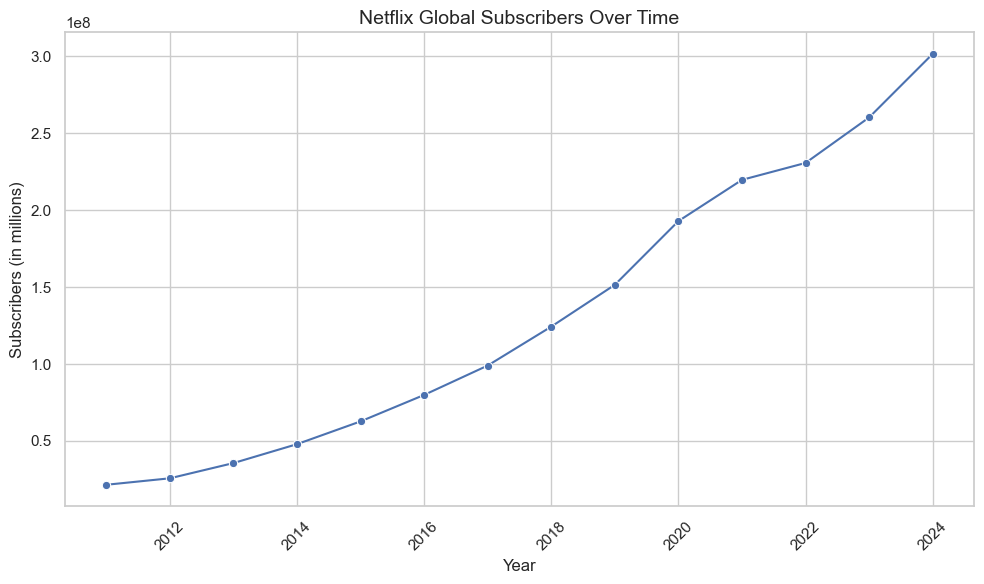

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(data=subscribers_df, x='Year', y='Netflix Subscribers', color=sns.color_palette("Blues_d")[2])

plt.title("Netflix Global Subscribers by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Subscribers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(data=subscribers_df, x='Year', y='Netflix Subscribers', marker='o')

plt.title("Netflix Global Subscribers Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Subscribers (in millions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))




### 📊 Global Subscriber Growth Over Time

From 2011 to 2024, Netflix saw an exponential increase in subscribers—from just over **21 million** to more than **300 million**. The bar chart and line graph below clearly illustrate this remarkable growth, highlighting how Netflix capitalized on original content and global distribution strategies to boost its user base.

In [143]:
subscribers_by_country = df['Country'].value_counts().reset_index()
subscribers_by_country.columns = ['Country', 'Subscriber Count']
subscribers_by_country.index = range(1, len(subscribers_by_country) + 1)
subscribers_by_country



,Country,Subscriber Count
1,UK,2592
2,Germany,2547
3,India,2505
4,USA,2503
5,Brazil,2503
6,Mexico,2493
7,Canada,2490
8,France,2473
9,Japan,2457
10,Australia,2437


### 🌍 Subscribers by Country

Netflix’s global footprint is extensive. The following table showcases subscriber counts by country, based on our dataset. Countries like the United States, India, and Brazil dominate the top spots, indicating strong market penetration in both developed and emerging markets.

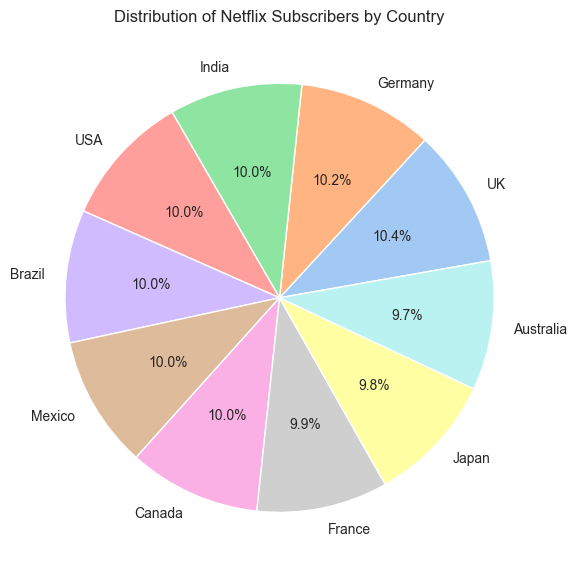

In [144]:
subscribers_by_country
country_counts = df['Country'].value_counts()
colors = sns.color_palette('pastel', n_colors=len(country_counts))

plt.figure(figsize=(6, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=10 ,colors=colors,
    textprops={'fontsize': 10})
plt.title('Distribution of Netflix Subscribers by Country')
plt.tight_layout()
plt.show()




### 📌 Distribution of Subscribers by Country

To visualize this distribution, we use a pie chart that shows the proportion of users by country. While the U.S. remains the largest market, the presence of countries from Asia, Europe, and South America highlights Netflix’s success in localizing content and adapting to international markets.

,Subscription Type,Number of Users
1,Premium,8402
2,Basic,8356
3,Standard,8242


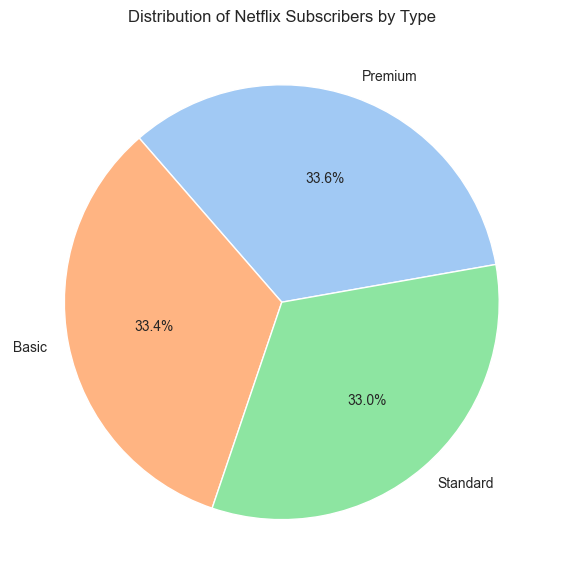

In [145]:
subscription_counts = df['Subscription_Type'].value_counts().reset_index()
subscription_counts.columns = ['Subscription Type', 'Number of Users']
subscription_counts.index = subscription_counts.index + 1  
display(subscription_counts)


type_counts = df['Subscription_Type'].value_counts()
colors = sns.color_palette('pastel', n_colors=len(country_counts))

plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels= type_counts.index, autopct='%1.1f%%', startangle=10 ,colors=colors,
    textprops={'fontsize': 10})
plt.title('Distribution of Netflix Subscribers by Type')
plt.tight_layout()
plt.show()





### 💳 Subscription Types Across Users

Netflix offers different subscription plans tailored to user preferences and price points. The table and pie chart below display the distribution of these plans across the user base. A large share of subscribers opt for the **Standard** plan, balancing cost and streaming quality.

In [146]:
df.groupby(['Country', 'Subscription_Type']).size().reset_index(name='Subscriber Count')

,Country,Subscription_Type,Subscriber Count
0,Australia,Basic,786
1,Australia,Premium,836
2,Australia,Standard,815
3,Brazil,Basic,823
4,Brazil,Premium,858
5,Brazil,Standard,822
6,Canada,Basic,795
7,Canada,Premium,830
8,Canada,Standard,865
9,France,Basic,872


### 🌐 Country vs Subscription Type Breakdown

To further understand how Netflix tailors its offerings, we analyzed subscription types per country. This breakdown reveals how regional pricing and market strategies influence user preferences.

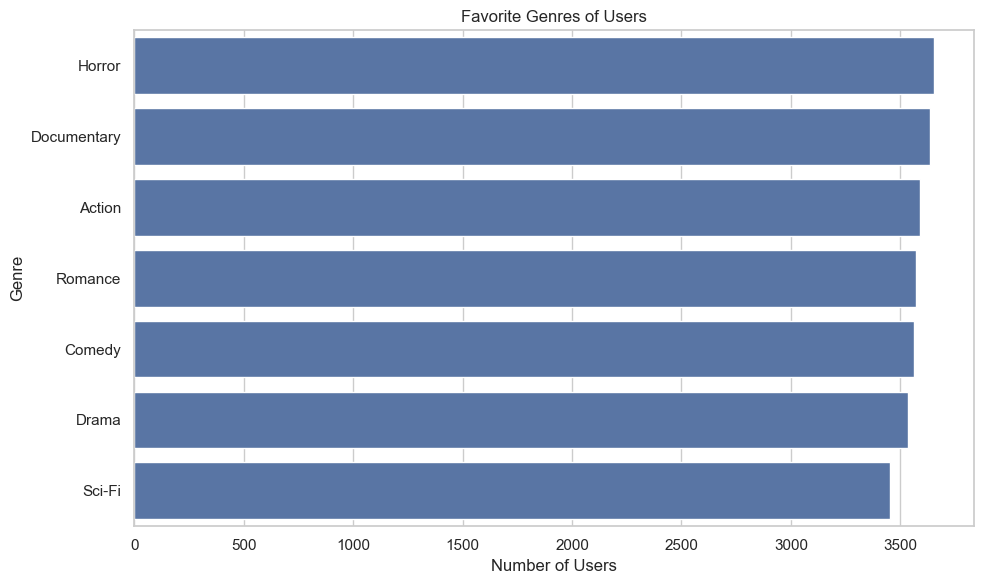

In [147]:


sns.countplot(data=df, y='Favorite_Genre', order=df['Favorite_Genre'].value_counts().index)
plt.title('Favorite Genres of Users')
plt.xlabel('Number of Users')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


### 📌 Chapter Summary: Subscribers & Global Reach

This chapter highlights how Netflix's subscriber base has grown and diversified across the globe in recent years. Through a combination of time-series data and user-level insights, we explored:

- **Global Subscriber Growth**: Netflix's user base skyrocketed from approximately 21 million in 2011 to over 300 million in 2024, reflecting its global expansion and content strategy success.
- **Subscribers by Country**: We identified which countries host the largest segments of Netflix’s audience, revealing a strong presence not just in the U.S., but across India, Brazil, and other international markets.
- **Subscription Type Distribution**: Our analysis showed how users are distributed across different subscription tiers such as Basic, Standard, and Premium.
- **Popular Genres Across Markets** : Genre preferences provided a lens into cultural and regional content consumption trends.

Together, these findings illustrate how Netflix has not only scaled its platform globally but also attracted a diverse user base with varying content preferences and subscription choices.
